In [1]:
print('Hare Krishna')

Hare Krishna


In [ ]:
!pip install qiskit
!pip install qiskit_machine_learning
!pip install pylatexenc

In [4]:
#qiskit ad_hoc_data
import matplotlib.pyplot as plt
from qiskit.utils import algorithm_globals
algorithm_globals.random_seed = 3142

import numpy as np
np.random.seed(algorithm_globals.random_seed)

from qiskit_machine_learning.datasets import ad_hoc_data
TRAIN_DATA, TRAIN_LABELS, TEST_DATA, TEST_LABELS = (
    ad_hoc_data(training_size=20,
                test_size=5,
                n=2,
                gap=0.3,
                one_hot=False))

d_set = 'ad_hoc_data'

In [5]:
#moon data set
import tensorflow as tf
from sklearn.datasets import make_moons

# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

X, y = make_moons(n_samples=40, noise=0.1)
TRAIN_DATA, TRAIN_LABELS = X,y
TEST_DATA, TEST_LABELS =X[30:],y[30:]
d_set = 'make_moons'

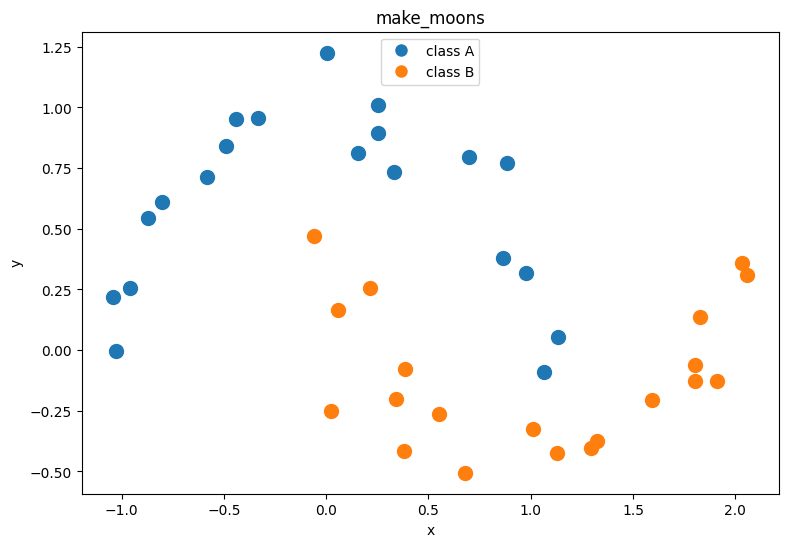

In [6]:
from matplotlib.lines import Line2D
plt.figure(figsize=(9, 6))

for feature, label in zip(TRAIN_DATA, TRAIN_LABELS):
    COLOR = 'C0' if label == 0 else 'C1'
    plt.scatter(feature[0], feature[1],
                marker='o', s=100, color=COLOR)



legend_elements = [
    Line2D([0], [0], marker='o', c='w', mfc='C0', label='class A', ms=10),
    Line2D([0], [0], marker='o', c='w', mfc='C1', label='class B', ms=10),
]

plt.legend(handles=legend_elements, #bbox_to_anchor=(1, 1),
           loc='upper center')

plt.title(d_set)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

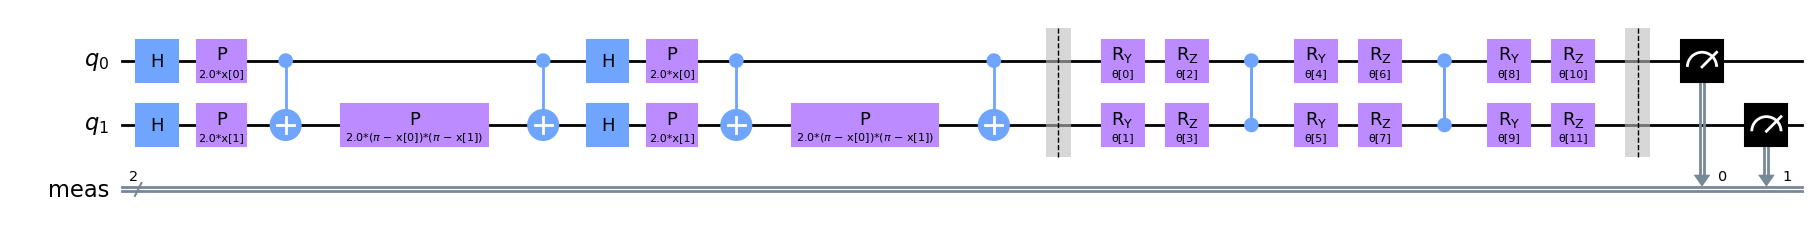

In [7]:
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
FEATURE_MAP = ZZFeatureMap(feature_dimension=2, reps=2)
FEATURE_MAP.barrier()
VAR_FORM = TwoLocal(2, ['ry', 'rz'], 'cz', reps=2)


AD_HOC_CIRCUIT = FEATURE_MAP.compose(VAR_FORM)
AD_HOC_CIRCUIT.measure_all()
AD_HOC_CIRCUIT.decompose().draw('mpl', fold = -1)

In [8]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
train_labels_oh = encoder.fit_transform(TRAIN_LABELS.reshape(-1, 1)
                                       ).toarray()
test_labels_oh = encoder.fit_transform(TEST_LABELS.reshape(-1, 1)
                                      ).toarray()
#print(test_labels_oh)

In [11]:
from qiskit import BasicAer, execute
#initial_point = np.random.random(VAR_FORM.num_parameters)
initial_point = np.array([0.3200227 , 0.6503638 , 0.55995053,
                          0.96566328, 0.38243769, 0.90403094,
                          0.82271449, 0.26810137, 0.61076489,
                          0.82301609, 0.11789148, 0.29667125])
#print(initial_point)
from qiskit_machine_learning.algorithms.classifiers import VQC
#log = OptimizerLog()
vqc = VQC(feature_map=FEATURE_MAP,
          ansatz=VAR_FORM,
          loss='cross_entropy',
          initial_point=initial_point,
          quantum_instance=BasicAer.get_backend('qasm_simulator'))

#print('Before training', initial_point)
vqc.fit(TRAIN_DATA, train_labels_oh)

#print('\nAfter training', vqc.weights)

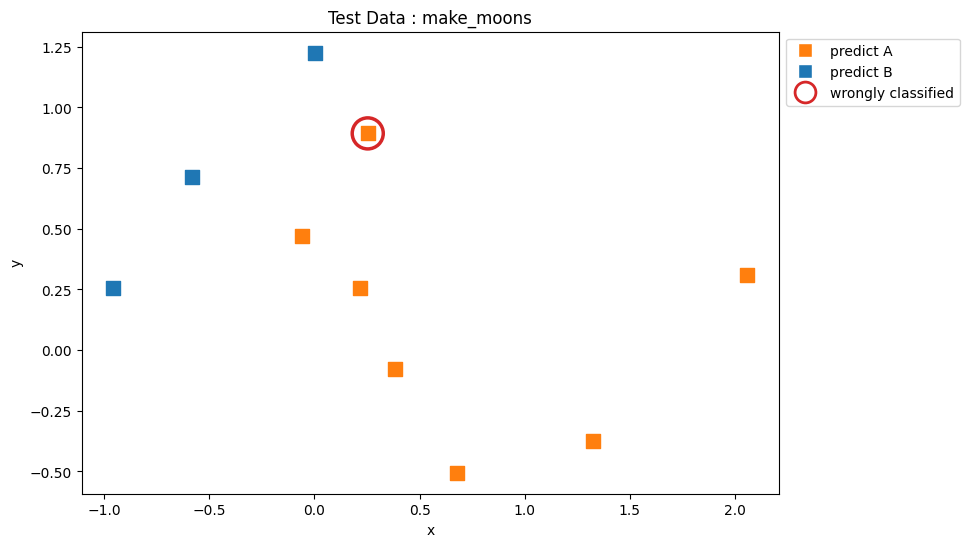

In [12]:
from matplotlib.lines import Line2D
plt.figure(figsize=(9, 6))



for feature, label, pred in zip(TEST_DATA, test_labels_oh,
                                vqc.predict(TEST_DATA)):
    COLOR = 'C1' if pred[0] == 0 else 'C0'
    plt.scatter(feature[0], feature[1], marker='s', s=100, color=COLOR)
    if not np.array_equal(label,pred):  # mark wrongly classified
        plt.scatter(feature[0], feature[1], marker='o', s=500,
                    linewidths=2.5, facecolor='none', edgecolor='C3')

legend_elements = [
    Line2D([0], [0], marker='s', c='w', mfc='C1', label='predict A',
           ms=10),
    Line2D([0], [0], marker='s', c='w', mfc='C0', label='predict B',
           ms=10),
    Line2D([0], [0], marker='o', c='w', mfc='none', mec='C3',
           label='wrongly classified', mew=2, ms=15)
]

plt.legend(handles=legend_elements, bbox_to_anchor=(1, 1),
           loc='upper left')

plt.title('Test Data : ' + d_set)
plt.xlabel('x')
plt.ylabel('y')
plt.show()